In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [14]:
#read in data
df = pd.read_excel("Week5Bond.xlsx")

#filter only acceptable responses
df = df[df["Response"]=="Acceptable"].reset_index(drop=True)

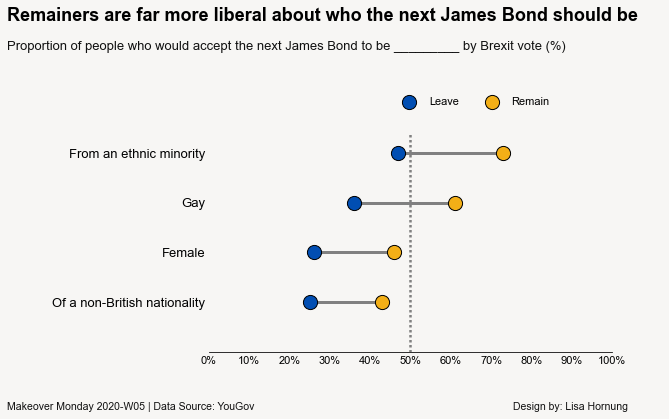

In [155]:
# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(7,4))
fig.set_facecolor("#f7f6f4")

colors = {"Remain": "#F3AF17", "Leave": "#014EB2"}

#remove grid
for pos in ['right', 'top',  'left']:
    plt.gca().spines[pos].set_visible(False)
    
#make plot area transparent
plt.gca().patch.set_alpha(0) 

plt.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.80, wspace=None, hspace=None)

# sort data by Remain values
df = df.sort_values(by="Remain", ascending=True)
my_range=range(1,len(df.index)+1)


# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=df['Leave'], xmax=df['Remain'],linewidth=3, color='grey', alpha=1, zorder=2)
plt.scatter(df['Leave'], my_range, s=200, color=colors["Leave"],linewidth=1, edgecolors='black', 
            alpha=1 , label='Leave', zorder=3)
plt.scatter(df['Remain'], my_range, s=200, color=colors["Remain"], linewidth=1, edgecolors='black', 
            alpha=1, label='Remain', zorder=3)


#annotation
plt.hlines(y=my_range, xmin=df['Leave'], xmax=df['Remain'],linewidth=3, color='grey', alpha=1, zorder=2)

plt.plot([50, 50], [0,4.4],linestyle= (0,(1, 1)), linewidth=2.5, color='grey')
#
#y-axis
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.tick_params(axis='y', labelsize=13)
plt.gca().set_ylim(ymin=0)
plt.yticks(my_range, df['Category'], fontfamily='Arial')

#x-axis
plt.xticks(np.arange(0,110,10), fontfamily='Arial')
plt.tick_params(axis='x', labelsize=11)
plt.gca().set_xlim(xmin=0, xmax=100)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:,.0f}%'.format(x)))

#legend
L = ax.legend(ncol=2, frameon=False, loc='upper right',bbox_to_anchor=(0.87,1.15), fontsize=11)
plt.setp(L.texts, family='Arial')


# Add title
plt.figtext(-0.3,1.15,'Remainers are far more liberal about who the next James Bond should be',
         fontsize = 18, weight = 'bold', fontfamily='Arial', color='black')
plt.figtext(-0.3,1.05, "Proportion of people who would accept the next James Bond to be _________ by Brexit vote (%)", 
            fontsize=13, ha='left',  color="#111111", fontfamily="Arial")

#footer
plt.figtext(-0.3,-0.2, "Makeover Monday 2020-W05 | Data Source: YouGov", fontsize=10.5,
            ha='left', color="#111111", fontfamily="Arial")
plt.figtext(1.0,-0.2, "Design by: Lisa Hornung            ",
            fontsize=10.5, ha='right', color="#111111", fontfamily="Arial")

#save
plt.savefig("MakeoverMonday2020W05_brexit-bond.png", bbox_inches="tight",pad_inches=0.2)


# Show the graph
plt.show()